<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2012/OneCycleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git

In [1]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments')
!git pull origin master

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 6 (delta 5), reused 6 (delta 5), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/jai2shan/TSAI-EVA40-Assignments
 * branch                master     -> FETCH_HEAD
   553eacd2e..2bb2440e7  master     -> origin/master
Updating 553eacd2e..2bb2440e7
Fast-forward
 Session 12/Scripts/DataLoader.py |  8 +++---
 Session 12/Scripts/resnet.py     | 55 ++++++++++++++++++----------------------
 2 files changed, 29 insertions(+), 34 deletions(-)


In [2]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')

In [3]:
import torch
import torchvision
import os
from torchvision import transforms
from DataLoader import *

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')
train_path = 'train'
test_path = 'test'
train_loader,test_loader = data_loader_(train_path,test_path,128)

In [4]:
import torch
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from resnet import ResNet18
net = ResNet18(num_classes = 200).to(device)
summary(net, input_size=(3,64,64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


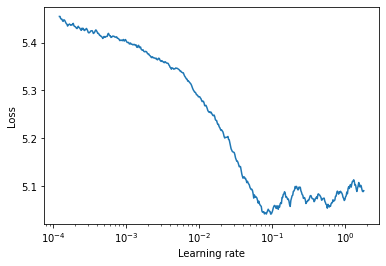

0.09600134366907874

In [5]:
from LR_Finder import *
from Training_Testing import *
tt = TrainTest()
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)
# scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

lr_finder = LRFinder(net, optimizer, criterion)
lr_finder.range_test(train_loader, end_lr=2, num_iter=500,step_mode="exp")
lr_finder.plot()

import pandas as pd
lr_ = pd.DataFrame(lr_finder.history)
lr_max = lr_.loc[lr_['loss']==lr_['loss'].min(),'lr'].values[0]
lr_max

In [7]:
# lr_min =  LR_Min(train_loader,lr_max)

In [ ]:
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

net = ResNet18(num_classes = 200).to(device)
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.85,weight_decay = 0.0005)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr = lr_max, 
                                          pct_start = 0.3, # 15/50
                                          epochs =50,
                                          steps_per_epoch=len(train_loader),
                                          div_factor = 10,
                                          final_div_factor = 1)

for epoch in range(50):
    print("EPOCH:", epoch)
    tt.train_(net, device, train_loader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, test_loader)  
    scheduler.step()
       
print('Finished Training')

  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.277472496032715 Batch_id=546 Accuracy=6.05: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -2.6387, Accuracy: 3327/30000 (11.09%)

EPOCH: 1


Loss=3.7770755290985107 Batch_id=546 Accuracy=13.93: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -3.7157, Accuracy: 5140/30000 (17.13%)

EPOCH: 2


Loss=3.4049031734466553 Batch_id=546 Accuracy=19.60: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -4.7537, Accuracy: 6781/30000 (22.60%)

EPOCH: 3


Loss=3.1466145515441895 Batch_id=546 Accuracy=24.82: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -4.9830, Accuracy: 7513/30000 (25.04%)

EPOCH: 4


Loss=2.9198801517486572 Batch_id=546 Accuracy=28.89: 100%|██████████| 547/547 [02:59<00:00,  3.04it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -5.6830, Accuracy: 8884/30000 (29.61%)

EPOCH: 5


Loss=3.099303960800171 Batch_id=546 Accuracy=32.71: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -5.9933, Accuracy: 9167/30000 (30.56%)

EPOCH: 6


Loss=2.6071155071258545 Batch_id=546 Accuracy=35.84: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.5727, Accuracy: 10641/30000 (35.47%)

EPOCH: 7


Loss=2.4895377159118652 Batch_id=546 Accuracy=38.49: 100%|██████████| 547/547 [02:59<00:00,  3.04it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.8131, Accuracy: 11403/30000 (38.01%)

EPOCH: 8


Loss=2.4765846729278564 Batch_id=546 Accuracy=40.59: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -7.3091, Accuracy: 11675/30000 (38.92%)

EPOCH: 9


Loss=2.443532705307007 Batch_id=546 Accuracy=42.61: 100%|██████████| 547/547 [02:59<00:00,  3.04it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -7.0471, Accuracy: 11696/30000 (38.99%)

EPOCH: 10


Loss=2.3107566833496094 Batch_id=546 Accuracy=44.86: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -7.6667, Accuracy: 12726/30000 (42.42%)

EPOCH: 11


Loss=1.9372471570968628 Batch_id=546 Accuracy=46.62: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -7.5907, Accuracy: 13022/30000 (43.41%)

EPOCH: 12


Loss=2.440160036087036 Batch_id=546 Accuracy=48.40: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -7.9712, Accuracy: 13372/30000 (44.57%)

EPOCH: 13


Loss=2.073697805404663 Batch_id=546 Accuracy=50.15: 100%|██████████| 547/547 [02:59<00:00,  3.04it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -7.7648, Accuracy: 13312/30000 (44.37%)

EPOCH: 14


Loss=1.8925162553787231 Batch_id=546 Accuracy=51.59: 100%|██████████| 547/547 [02:59<00:00,  3.04it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -8.1364, Accuracy: 13932/30000 (46.44%)

EPOCH: 15


Loss=1.705337405204773 Batch_id=546 Accuracy=53.23: 100%|██████████| 547/547 [02:59<00:00,  3.04it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -8.0574, Accuracy: 14088/30000 (46.96%)

EPOCH: 16


Loss=2.1862525939941406 Batch_id=546 Accuracy=54.66: 100%|██████████| 547/547 [02:59<00:00,  3.04it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -8.5970, Accuracy: 14373/30000 (47.91%)

EPOCH: 17


Loss=1.834209680557251 Batch_id=546 Accuracy=56.30: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -8.4436, Accuracy: 14673/30000 (48.91%)

EPOCH: 18


Loss=1.750791311264038 Batch_id=546 Accuracy=57.65: 100%|██████████| 547/547 [02:59<00:00,  3.04it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -8.7771, Accuracy: 14588/30000 (48.63%)

EPOCH: 19


Loss=1.6540107727050781 Batch_id=546 Accuracy=58.90: 100%|██████████| 547/547 [02:59<00:00,  3.04it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -8.7720, Accuracy: 14720/30000 (49.07%)

EPOCH: 20


Loss=1.650702714920044 Batch_id=546 Accuracy=60.37: 100%|██████████| 547/547 [02:59<00:00,  3.05it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -9.2719, Accuracy: 15018/30000 (50.06%)

EPOCH: 21


Loss=1.4580540657043457 Batch_id=149 Accuracy=62.85:  27%|██▋       | 150/547 [00:49<02:10,  3.05it/s]